# hw6-FloPy-DataTypeExample
## By `Benjamin Mitchell`, `Dave Murray`, `Tesfa Gebremeskel`


# 1. Starting Summery

**What is FloPy?** It is an system of python code to directly interface with and read the files produced by MODFLOW.  These files include: `.bas`, `.cbc`, `.ddn`, `.dis`, `.hds`, `.list`, `.lpf`, `.nam`, `.oc`, `.pcg`.  The full names of these file types are ***Basic Package Input; cell-by-cell budget; Drawdown File Type; Discretization File; Heads Output; List of Outputs; Layer-Property Flow package; MODFLOW Name File; Output Control Option; Preconditioned Conjugate-Gradient Package***, respectively.

**Some of these file types created are easily traced back to the inputs we gave to MODFLOW:**
   - dis = flopy.modflow.ModflowDis(...) - results in a `.dis` file
   - bas = flopy.modflow.ModflowBas(...) - results in a `.bas` file 
   - lpf = flopy.modflow.ModflowLpf(...) - results in a `.lpf` file
   - oc =  flopy.modflow.ModflowOc(...)  - results in a `.oc` file
   - pcg = flopy.modflow.ModflowPcg(...) - results in a `.pcg` file
   - ect.

Along with some other inputs, the five inputs above are needed for the most basic of MODFLOW analysis.  Here is the boil down for these files.  The `.dis` defines your model's domain.  The `.bas` file defines boundaries for your model's domain (no flow, constant head, ect.).  The `.lpf` file defines the properties of your model, stuff like vertical and horizontal hydraulic conductivity.  The `.oc` are for dealing with writing outputs and `.pcg` is a package that helps write properties to the model's domain along with other inputs.

Some of the outputs files worth mentioning would be `.hds` and `.cbc`.  The `.hds` file is the resulting heads of running your MODFLOW model and the `.cbc` file contains the cell-by-cell water budget that was solved to get the final heads found in the `.hds` file.  These file types are specific to flopy and are read by flopy commands.  These are the file types we will be focusing on today and are explained in greater detail, with examples, later in this notebook.

# 2. Helpful Links/Videos

- Webpage Links:
    - http://modflowpy.github.io/flopydoc/
    - https://modflowpy.github.io/flopydoc/code.html#base-classes
    - [utility modules](https://modflowpy.github.io/flopydoc/binaryfile.html)
    - https://github.com/modflowpy/flopy#citation-for-flopy

- Video Links:
    - [Using MODFLOW in Python with FloPy](https://www.youtube.com/watch?v=kqEDaLR9rB0) (youtube)
    - [Using MODFLOW in Python with FloPy and GDAL](https://www.youtube.com/watch?v=dxF_6bQnq7g) (youtube)


# 3. Cheat Sheet Links from all HW's

## Different types of FloPy seen through HW's 1-5:
- [(Import)flopy.utils.binaryfile](https://modflowpy.github.io/flopydoc/binaryfile.html)
- [flopy.modflow.Modflow(...)](https://modflowpy.github.io/flopydoc/mf.html)
- [flopy.modflow.ModflowDis(...)](https://modflowpy.github.io/flopydoc/mfdis.html)
- [flopy.plot.PlotMapView(...)](https://modflowpy.github.io/flopydoc/tutorial2.html)
- [flopy.modflow.ModflowBas(...)](https://modflowpy.github.io/flopydoc/mfbas.html)
- [flopy.modflow.ModflowLpf(...)](https://modflowpy.github.io/flopydoc/mflpf.html)
- [flopy.modflow.ModflowOc(...)](https://modflowpy.github.io/flopydoc/mfoc.html)
- [flopy.modflow.ModflowPcg(...)](https://modflowpy.github.io/flopydoc/mfpcg.html)
- [flopy.modflow.mfwel.ModflowWel(...)](https://modflowpy.github.io/flopydoc/mfwel.html)
- [flopy.modflow.ModflowWel(...)](https://modflowpy.github.io/flopydoc/mfwel.html)
- [flopy.utils.binaryfile.HeadFile(...)](https://modflowpy.github.io/flopydoc/binaryfile.html)
- [flopy.utils.binaryfile.CellBudgetFile(...)](https://modflowpy.github.io/flopydoc/binaryfile.html)
- [flopy.utils.util_array.Util3d(...)](https://modflowpy.github.io/flopydoc/util_array.html)
- [flopy.utils.reference.SpatialReference(...)](https://modflowpy.github.io/flopydoc/reference.html)
- [flopy.utils.util_array.Util2d(...)](https://modflowpy.github.io/flopydoc/util_array.html)
- [flopy.utils.reference.TemporalReference(...)](https://modflowpy.github.io/flopydoc/reference.html)
- [flopy.modflow.mfrch.ModflowRch(...)](https://modflowpy.github.io/flopydoc/mfrch.html)
- [flopy.modpath.ParticleData(...)](https://modflowpy.github.io/flopydoc/mp7particledata.html)
- [flopy.modpath.ParticleGroup(...)](https://modflowpy.github.io/flopydoc/mp7particlegroup.html)
- [flopy.modpath.CellDataType(...)](https://modflowpy.github.io/flopydoc/mp7particledata.html)
- [flopy.modpath.LRCParticleData(...)](https://modflowpy.github.io/flopydoc/mp7particledata.html)
- [flopy.modpath.ParticleGroupLRCTemplate(...)](https://modflowpy.github.io/flopydoc/mp7particlegroup.html)
- [flopy.modpath.Modpath7(...)](https://modflowpy.github.io/flopydoc/mp7.html)
- [flopy.modpath.Modpath7Bas(...)](https://modflowpy.github.io/flopydoc/mp7bas.html)
- [flopy.modpath.Modpath7Sim(...)](https://modflowpy.github.io/flopydoc/mp7sim.html)
- [flopy.modpath.Modpath7.create_mp7(...)](https://modflowpy.github.io/flopydoc/mp7.html)
- [flopy.utils.PathlineFile(...)](https://modflowpy.github.io/flopydoc/modpathfile.html)
- [flopy.utils.EndpointFile(...)](https://modflowpy.github.io/flopydoc/modpathfile.html)
- [flopy.modflow.mfevt.ModflowEvt(...)](https://modflowpy.github.io/flopydoc/mfevt.html)

## Flopy data types, head and budget files

In order to access the binary data outputs created by MODFLOW, flopy uses [utility modules](https://modflowpy.github.io/flopydoc/binaryfile.html). We use the Headfile and the CellBudgetFile utility modules to access the data in the modflow outputs.

### Head File Object
The class *flopy.utils.binaryfile.HeadFile* creates a Headfile object with mutliple functions to view and retrieve the data. To confuse us more, the flopy resource describes it as "a record array consisting of headers, which are record arrays of the modflow header information (kstp, kper, pertim, totim, text, nrow, ncol, ilay)".

### Cell Budget File Object
Flopy has the class *flopy.utils.binaryfile.CellBudgetFile* to create objects with data to calculate the water budget at each cell.This imports the data from the ".cbc" file. What is returned is the Cell Budget File Object that is essentially a list of multiple Head File Object datatypes except with each one representing a flux instead of the head. We can pull fluxes for different times (or timestep and stressperiod List) or a time series for a cell. For this  in addition to the time or cell location we need to identify the record name (ET, Recharge, etc).

#### Commonly Used Attributes -
*list_records()* - prints out records that are available from the Head File object

*get_alldata()* -  For headfile this returns an array of all heads for all times. Not an attribute of the budget file object - will return an error

*get_data()* - We can use *get_data()* and specify the simulation time or timestep and period (list) to get the heads for that specific parameter. This is the default way to get data for the Budget file object requires record name parameter.

*get_times()* - returns a list of the simulation output times

*get_kstpkper()* -returns a list of all timestep and stress period combos

*get_ts()* - retrieve head values for each timestep for a cell or multiple cells - input for single cell as a tuple of (nlay, nrow, ncol), or list of tuples (for multiple cells). For the Budget file object this attribute requires record name parameter (e.g. text='ET')

*get_unique_record_names()* - Cell Budget File Object only - Find all the unique records that occur in the model output

#### Inital Set up for Box Model using MODFLOW
##### 1. Setup the environment

In [65]:
#the basics
import flopy
import numpy as np
import matplotlib as mp
import os

#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import csv

#jupyter specific--included to show plots in notebook
%matplotlib inline 

##### 2. Create the model object

In [66]:
modelname = "Box_Model"
moddir="/WRDAPP/MF2005.1_12/bin/mf2005" #this needs to be changed to your path finding!
m = flopy.modflow.Modflow(modelname, exe_name = moddir)
#moddir = os.getcwd()+"\\modflowdir\\mf2005.exe"

#optional delete old run files
run = 'n'
if run == 'y':
    file_extensions = ['.dis','.bas','.lpf','.oc','.pcg','.wel']
    for ext in file_extensions:
        os.remove(modelname + ext)

##### 3. Setup the discretization (DIS package)

For more details on DIS package inputs refer to : http://modflowpy.github.io/flopydoc/mfdis.html

In [67]:
# 3.1 Spatial discretization
nrow = 25 #number of rows
ncol = 25 #number of columns
nlay = 1  #number of layers

dx= 100 #width of grid cells in x diretion 
dy= 100 #width of grid cells in y diretion 

Lx = ncol*dx  #width of domain in x
Ly = nrow*dy #width of domain in y
ztop = 10.    #top elevation 
zbot = 0.     #bottom elevation

dz = (ztop - zbot) / nlay #cell height in z direction

# 3.2 Temporal discretization
nper = 1 #number of stress periods 
steady = [True] #list noting the stress period type

# 3.3 Create DIS object
#create flopy discretization object, length and time are meters (2) and days (4)
dis = flopy.modflow.ModflowDis(model=m, nlay=nlay, nrow=nrow, ncol=ncol, 
                               delr=dx, delc=dy, top=ztop, botm=zbot, 
                               itmuni = 4, lenuni = 2, 
                               nper=nper, steady=steady)

##### 4. Setup constant head boundaries, active cells and initial heads (BAS Package)

For more details on the BAS package see: http://modflowpy.github.io/flopydoc/mfbas.html

In [68]:
# 4.1 Define cell activity: IBOUND 
#create ibound as array of ints = 1
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32) #integer array of dim (z,y,x), makes all cells active                                                     
#set constand head boundary on the left
ibound[:,:,0] = -1          #replace leftmost column (all zs, all ys, first x) with -1 to indicate constant head 

#print("ibound values: \n", ibound)

# Define starting heads
#setup initial heads as 1 everywhere and 7 on the left boundary 
H_init = np.ones((nlay, nrow, ncol), dtype=np.float32)  #float array (i.e. decimal), sets all heads to 1.0
H_init[:, :, 0] = 7    #replace first (left) col with desired head value

#print("starting head values: \n", H_init)

# 4.3 Create BAS object
#create flopy bas object
bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=H_init)

##### 5. Setup Layer Properties  (LPF Package)

For more details on LPF package see: http://modflowpy.github.io/flopydoc/mflpf.html

In [69]:
# 5.1 Set layer properties
K_horiz = 1.    #horizontal hydraulic conductivity 
K_vert = 0.1    #assign vertical hydraulic conductivity (along z axis)
n = 0.35        #assign porosity
Ss = 0.001      #assign storage coefficient
Sy = 0.3        #assign specific yield
uncnf = 1       #0=confined, >0 = unconfined

# 5.2 Make LPF object
#assigns horiz  and vertical Ks and saves cell-by-cell budget data
lpf = flopy.modflow.ModflowLpf(m, laytyp=uncnf, hk=K_horiz, 
                               vka=K_vert, ss=Ss,
                               sy=Sy,storagecoefficient=True, ipakcb=53)

##### 6. Setup outputs by stress period (OC Package)

For more details on OC Package: http://modflowpy.github.io/flopydoc/mfoc.html

In [70]:
# 6.1 Setup outputs
#create oc stress period data. 
#(0,0) tells OC package to save data for stress period 1, time step 1.
spd = {(0,0):['print head', 'print budget', 'save head', 'save budget']} #create a dictionary for stress period data, where key (0,0) is associated with value ['print...'] 

#print("oc stress period data: \n", spd)

# 6.2 Make OC object
oc = flopy.modflow.ModflowOc(model=m, stress_period_data=spd, compact=True)

##### 7. Set the numerical solver (PCG Package)

We are using the Preconditioned Conjugate Gradient package:

Additionally, MODFLOW online describes these solvers: https://water.usgs.gov/ogw/modflow/MODFLOW-2005-Guide/index.html?oc.htm

And Flopy documents its communication with the PCG MODFLOW package: http://modflowpy.github.io/flopydoc/mfpcg.html

In [71]:
# 7.1 Make the PCG object
pcg = flopy.modflow.ModflowPcg(model=m)

##### 8. Add wells for the constant flux boundary (WEL Package)

For more details on the WEL package see: http://modflowpy.github.io/flopydoc/mfwel.html

In [72]:
# 8.1 Setup the well parameters
Q_in = 25                           #total flow crossing right boundary (m3/day)
Q_cell = Q_in / nrow                 #flow entering each cell (m3/day)
fluxes = np.zeros((nrow,4))          #create array of zeros (# of rows, # of parameters: [lay, row, col, flux])
for i in range(nrow):                #iterate over rows & assign constant flux to each cell in leftmost column
    fluxes[i,:] = [0,i,ncol-1,Q_cell]     #[lay, row, col, flux]
#print(fluxes)

sp_fluxes = {0: fluxes}              #create a dictionary with entries for each stress period

#print(sp_fluxes)

# 8.2 Make the WEL object
wel = flopy.modflow.mfwel.ModflowWel(m, stress_period_data=sp_fluxes)  #create object for WEL package

##### 9. Write inputs and run the model

In [73]:
# 9.1 Write Inputs
m.write_input()    #uses the package objects created above to actually write the text files, 
                    #and saves to folder that this script is in
                    #after this step you should see the files appear in your folder
# 9.2 Run the model
success, mfoutput = m.run_model(pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

FloPy is using the following  executable to run the model: /WRDAPP/MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Box_Model.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/03/26 11:51:16

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2020/03/26 11:51:16
 Elapsed run time:  0.018 Seconds

  Normal termination of simulation


### Example from Box Model (HW1) - Steady state model

In [74]:
import flopy
import numpy as np

headobj = flopy.utils.binaryfile.HeadFile('Box_Model.hds') #Get head values for simple steady state model
headobj.list_records() #shows records that are available
h = headobj.get_alldata() #Creates an array (ntimes, nlay, nrow, ncol)
print(type(h))
#print(h)
h2 = headobj.get_data(totim=1, mflay=0) #Creates array (nrow, ncol)
print(type(h2))
#print(h2.dtype)
print (h[0,0,0,:]) #print heads for 1st row, all columns
print (h2[0,:]) #print heads for 1st row, all columns


(1, 1, 1., 1., b'            HEAD', 25, 25, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[7.        7.1414423 7.280136  7.4162354 7.5498815 7.6812015 7.810313
 7.9373245 8.062335  8.185435  8.306711  8.426242  8.5441    8.660355
 8.775068  8.888301  9.00011   9.110545  9.219659  9.327496  9.4341
 9.539513  9.643773  9.746919  9.848984 ]
[7.        7.1414423 7.280136  7.4162354 7.5498815 7.6812015 7.810313
 7.9373245 8.062335  8.185435  8.306711  8.426242  8.5441    8.660355
 8.775068  8.888301  9.00011   9.110545  9.219659  9.327496  9.4341
 9.539513  9.643773  9.746919  9.848984 ]


### Example from HW4 
Getting head values from a certain simulation time or time step and stressperiod.

In [75]:
# read in the heads
headobj = flopy.utils.binaryfile.HeadFile('ET_Model_CheckET2.hds')

#headobj.list_records()

h = headobj.get_alldata()
print(type(h))
#print (h)

#get data for specified simulation time
h = headobj.get_data(totim=100) #get data for specified simulation time
# print(type(h))
#print(h)

#NOTE: Can be helpful to get all the times in the head file using get_times()
t = headobj.get_times() # returns a list of simulation output times
# print(type(t))
# print(t)
#get data for a specific timestep and stressperiod(kstp, kper)
kstpkper = headobj.get_kstpkper()  

#print(kstpkper)

#Find the heads across the domain for a given timestep and stress period
h = headobj.get_data(kstpkper = (1,1))
#print(h)

#Timeseries
cell = (0,0,0) #single cell nlay, nrow, ncol 
ts = headobj.get_ts(cell) #returns an array (timestep, head value)
#print(ts)

cells = [(0,0,0), (0,1,1)] #list of tuples for two cells
ts = headobj.get_ts(cells) #returns an array (timestep, head value for cell 1, head value for cell 2)

#print(ts)

<class 'numpy.ndarray'>


### Budget Example

In [76]:
#create the budjet object from the data in the cbc file
budgobj = flopy.utils.binaryfile.CellBudgetFile('ET_Model_CheckET.cbc')
#print(type(budgobj))
recnames = budgobj.get_unique_record_names() #Find all the unique records that occur in the model output
#print(recnames)
#indices = budgobj.get_indices(text='ET')
#print(indices)

et = budgobj.get_data(text='ET', totim=1.0) #returns list of arrays with text identifier of ET in format (idx, nlay, nrow, ncol)
#print(type(et))
# for element in et[0]:
#     print(type(element))

recharge = budgobj.get_data(text='RECHARGE', totim=1.0) #returns an array of flow rates for front face of cells 

print(et[0][1][30][49]) #print ET FLux at cell from idx = 0, , nrow = 1, ncol = 49
print(recharge[0][1][0][49]) #print recharge Flux for same cell

#Sum all ET and Recharge Cells (from HW4)
print(np.sum(et[0][1]))
print(np.sum(recharge[0][1]))

-0.74454135
1.0
-1789.3469
2450.0


### Budget File - multiple times
Just like the headfile, we can pull heads for different times (or timestep and stressperiod List) or a time series for a cell. In addition to the time or cell location we need to identify the record name (ET, Recharge, etc)

In [77]:
#Find the flux across the domain for a given timestep and stress period
budgobj.list_records()

et = budgobj.get_data(kstpkper = (0,0), text='ET')
print(et[0][1])


#Timeseries
cell = (0,0,0) #single cell- tuple(nlay, nrow, ncol)
ts = budgobj.get_ts(idx=cell, text='ET') #returns an array (timestep, ETflux)
print(ts)

cells = [(0,0,0), (0,1,1)] #list of tuples for two cells
ts = budgobj.get_ts(idx=cells, text='ET') #returns an array (timestep, ET flux for cell 1, ET flux for cell 2)

print(ts)

(1, 1, b'   CONSTANT HEAD', 50, 50, -1, 2, 1., 1., 1., b'', b'', b'', b'')
(1, 1, b'FLOW RIGHT FACE ', 50, 50, -1, 1, 1., 1., 1., b'', b'', b'', b'')
(1, 1, b'FLOW FRONT FACE ', 50, 50, -1, 1, 1., 1., 1., b'', b'', b'', b'')
(1, 1, b'              ET', 50, 50, -1, 3, 1., 1., 1., b'', b'', b'', b'')
(1, 1, b'        RECHARGE', 50, 50, -1, 3, 1., 1., 1., b'', b'', b'', b'')
[[ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]
 [ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]
 [ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]
 ...
 [ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]
 [ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]
 [ 0.         -0.70188504 -0.70372266 ... -0.7444384  -0.7445071
  -0.74454135]]
[[1. 0.]]
[[ 1.          0.         -0.70188504]]


### Ploting your Data for Readability
One flopy function worth mentioning is the *flopy.plot.PlotMapView()*. This is flopy's way of reading outputs and graphically representing the file types above.

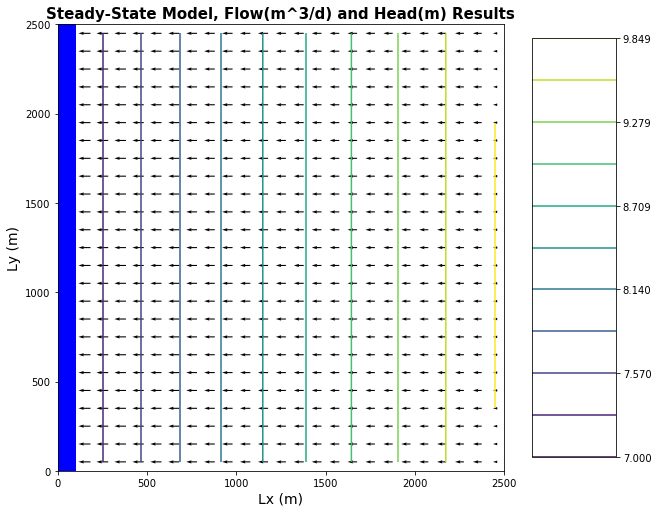

In [78]:
headobj = bf.HeadFile(modelname+'.hds')    #reads the binary head file
times = headobj.get_times()                #returns a list of timesteps
head = headobj.get_data(totim=times[-1])        #returns a numpy array of heads for specified time (last timestep)

budgobj = bf.CellBudgetFile(modelname+'.cbc')   #reads the cell budget file    
kstpkper_list = budgobj.get_kstpkper()          #returns a list of stress periods & timesteps
frf = budgobj.get_data(text='flow right face', totim=1.0) #returns an array of flow rates for right face of cells
fff = budgobj.get_data(text='flow front face', totim=1.0) #returns an array of flow rates for front face of cells     
         #string options are in the list file under output control (make sure to include spaces!)
#print("Flow through Right Face of Grid Cells m^3/d \n", frf,
#     "\n Flow through Front Face of Grid Cells m^3/d \n", fff)

#plot results
fig3=plt.figure(figsize=(10,10)) #create 10 x 10 figure
modelmap = flopy.plot.PlotMapView(model=m, layer=0) #use modelmap to attach plot to model
#grid = modelmap.plot_grid() #plot model grid
qm = modelmap.plot_ibound()  
contour_levels = np.linspace(head[0].min(),head[0].max(),11) #set contour levels for contouring head
head_contours = modelmap.contour_array(head, levels=contour_levels) #create head contours
flows = modelmap.plot_discharge(frf[0], fff[0], head=head) #create discharge arrows

#display parameters
plt.xlabel('Lx (m)',fontsize = 14)
plt.ylabel('Ly (m)',fontsize = 14)
plt.title('Steady-State Model, Flow(m^3/d) and Head(m) Results', fontsize = 15, fontweight = 'bold')
plt.colorbar(head_contours,aspect=5)
#plt.show(modelmap)
plt.savefig('BoxModel_vectors.png')

FloPy Works Cited
-----------------------------------------------

##### ***Citation for FloPy:***

[Bakker, M., Post, V., Langevin, C. D., Hughes, J. D., White, J. T., Starn, J. J. and Fienen, M. N., 2016, Scripting MODFLOW Model Development Using Python and FloPy: Groundwater, v. 54, p. 733–739, doi:10.1111/gwat.12413.](http://dx.doi.org/10.1111/gwat.12413)

##### ***Software/Code citation for FloPy:***

[Bakker, M., Post, V., Langevin, C. D., Hughes, J. D., White, J. T., Leaf, A. T., Paulinski, S. R., Larsen, J. D., Toews, M. W., Morway, E. D., Bellino, J. C., Starn, J. J., and Fienen, M. N., 2019, FloPy v3.3.1 &mdash; release candidate: U.S. Geological Survey Software Release, 15 December 2019, http://dx.doi.org/10.5066/F7BK19FH](http://dx.doi.org/10.5066/F7BK19FH)


MODFLOW Resources
-----------------------------------------------

+ [MODFLOW and Related Programs](http://water.usgs.gov/ogw/modflow/)
+ [Online guide for MODFLOW-2000](http://water.usgs.gov/nrp/gwsoftware/modflow2000/Guide/index.html)
+ [Online guide for MODFLOW-2005](http://water.usgs.gov/ogw/modflow/MODFLOW-2005-Guide/)
+ [Online guide for MODFLOW-NWT](http://water.usgs.gov/ogw/modflow-nwt/MODFLOW-NWT-Guide/)